DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


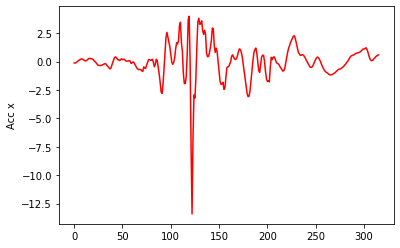

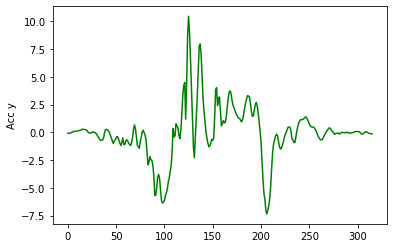

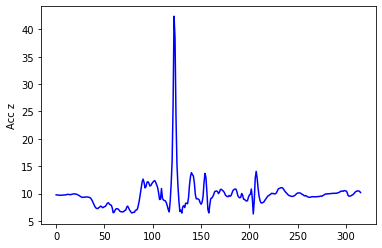

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

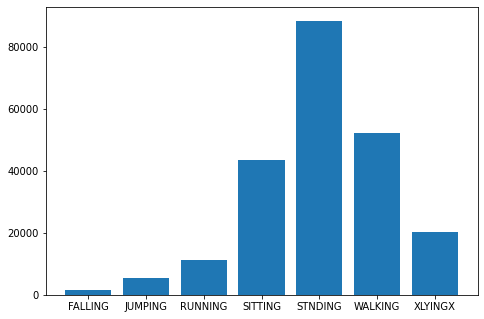

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

FALLING


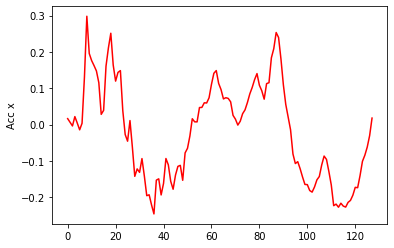

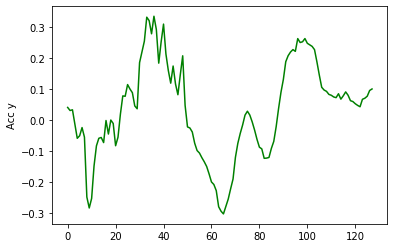

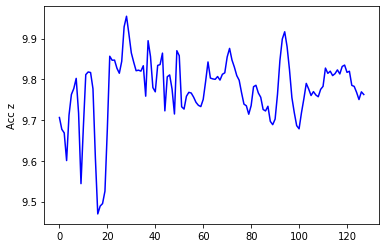

In [9]:
measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [11]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [12]:
from scipy.fft import dct

X_data = dct(X_data, axis=1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)
    

In [14]:
import data_transformation as dt

#X_train, y_train = data_augmentation2(X_train, y_train, [dt.window_warp, dt.window_slice], for_labels=[0])
#X_train, y_train = data_augmentation2(X_train, y_train, [dt.window_warp, dt.window_slice], for_labels=[6])

In [15]:
#check https://stackoverflow.com/questions/59979763/cant-get-done-conv1d-with-tf-keras
#check https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [16]:
from data_transformation import data_normalization
from data_transformation import min_max_scaler

X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

#X_train = min_max_scaler(X_train)
#X_test = min_max_scaler(X_test)

2021-09-03 13:00:30.186770: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-03 13:00:30.186927: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


# Classification NN

In [17]:
from models import ConvolutionalClassificationNN
  

model = ConvolutionalClassificationNN(num_labels)

model_test_data = X_train[0:10, :, :]
x = model(model_test_data)
print(x.shape)

(10, 7)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (10, 128, 16)             880       
_________________________________________________________________
activation (Activation)      (10, 128, 16)             0         
_________________________________________________________________
batch_normalization (BatchNo (10, 128, 16)             64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (10, 64, 16)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (10, 64, 32)              3616      
_________________________________________________________________
activation_1 (Activation)    (10, 64, 32)              0         
_________________________________________________________________
batch_normalization_1 (Batch (10, 64, 32)              1

In [19]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [20]:
#from focal_loss import SparseCategoricalFocalLoss

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
#loss_object = SparseCategoricalFocalLoss(gamma=2.0)
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_object, metrics=['acc'])


In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)
history = model.fit(X_train, y_train,
                epochs=100,
                shuffle=True,
                batch_size=128,
                validation_split=0.2,
                #class_weight=class_weights,
                callbacks=[callback])

Epoch 1/100
973/973 [==============================] - 23s 23ms/step - loss: 0.8128 - acc: 0.6902 - val_loss: 0.6550 - val_acc: 0.7450
Epoch 2/100
973/973 [==============================] - 23s 23ms/step - loss: 0.5843 - acc: 0.7751 - val_loss: 0.5097 - val_acc: 0.8057
Epoch 3/100
973/973 [==============================] - 23s 23ms/step - loss: 0.4833 - acc: 0.8195 - val_loss: 0.5206 - val_acc: 0.7886
Epoch 4/100
973/973 [==============================] - 23s 23ms/step - loss: 0.4239 - acc: 0.8428 - val_loss: 0.4771 - val_acc: 0.8195
Epoch 5/100
973/973 [==============================] - 23s 23ms/step - loss: 0.3763 - acc: 0.8605 - val_loss: 0.4803 - val_acc: 0.8171
Epoch 6/100
973/973 [==============================] - 23s 24ms/step - loss: 0.3428 - acc: 0.8733 - val_loss: 0.4144 - val_acc: 0.8422
Epoch 7/100
973/973 [==============================] - 23s 24ms/step - loss: 0.3140 - acc: 0.8844 - val_loss: 0.5146 - val_acc: 0.8204
Epoch 8/100
973/973 [==============================] - 

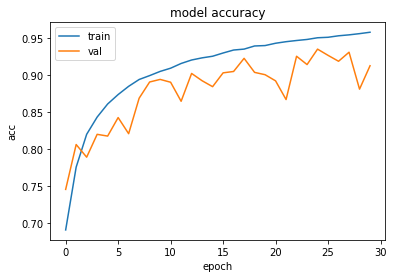

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

results = []
splits = 5
kf = KFold(n_splits=splits)
for train_idx, val_idx in kf.split(X_train, y_train):
  #train_x = X_train[train_idx]
  #train_y = y_train[train_idx]
  val_x = X_train[val_idx]
  val_y = y_train[val_idx]
  #loss, acc = model.evaluate(val_x, val_y)
  y_pred = model.predict(val_x)
  y_pred = np.argmax(y_pred, axis=1)
  f1_scores = f1_score(val_y, y_pred, average=None)
  print(f1_scores)
  #results.append(acc)
#print(results)
#print(np.mean(results))

[0.9343832  0.95928753 0.99713467 0.87768458 0.94344256 0.99493913
 0.84382202]
[0.945      0.9484127  0.99446434 0.87103082 0.93863585 0.99494121
 0.83826149]
[0.92011019 0.96027397 0.99780082 0.87900036 0.94096325 0.99595364
 0.84027037]
[0.92462312 0.9690027  0.99708832 0.87812068 0.94134652 0.9961326
 0.84438956]
[0.79616307 0.87640449 0.97799353 0.84709141 0.92143437 0.98313965
 0.79112364]


In [24]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2085/2085 - 3s - loss: 0.2866 - acc: 0.9096


In [25]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


In [26]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.80099502 0.91655716 0.97901679 0.96353547 0.87451286 0.97617997
 0.7817878 ]
Recall score:  [0.75058275 0.83532934 0.9810754  0.74702312 0.97285682 0.99053648
 0.76642097]


In [27]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " --- Recall " + str(recalls[i]))

FALLING: Precision 0.8009950248756219 --- Recall 0.7505827505827506
JUMPING: Precision 0.9165571616294349 --- Recall 0.8353293413173652
RUNNING: Precision 0.9790167865707434 --- Recall 0.9810753980174226
SITTING: Precision 0.9635354736424891 --- Recall 0.74702312360759
STNDING: Precision 0.8745128604832424 --- Recall 0.9728568197240444
WALKING: Precision 0.9761799735333039 --- Recall 0.9905364793145341
XLYINGX: Precision 0.7817878028404344 --- Recall 0.7664209664209665


In [28]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.7749699157641395
JUMPING: F1-score 0.8740601503759399
RUNNING: F1-score 0.9800450112528133
SITTING: F1-score 0.8415768748106799
STNDING: F1-score 0.9210671901490141
WALKING: F1-score 0.9833058270915322
XLYINGX: F1-score 0.7740281224152192


In [29]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

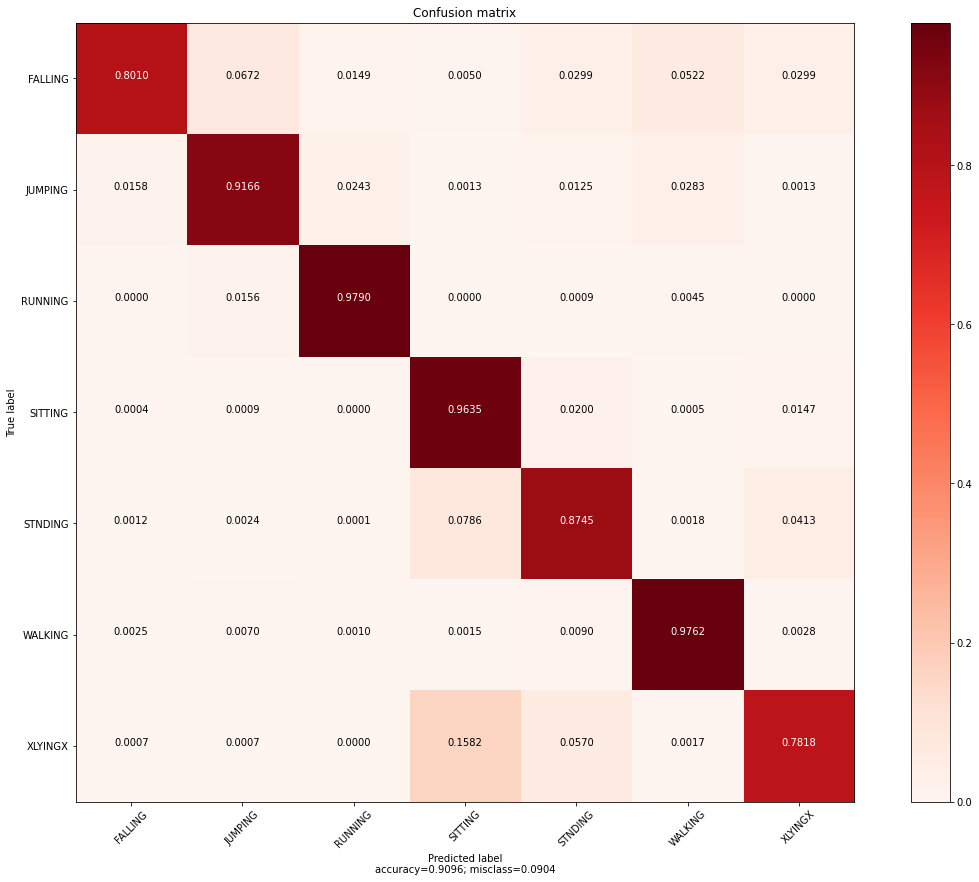

In [30]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)

In [31]:
model.save("models/best_CNN_DCT_model.h5")